In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [26]:
df = pd.read_csv('vehicles_us.csv')
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,6/23/2018,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,10/19/2018,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2/7/2019,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,3/22/2019,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,4/2/2019,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,6/20/2018,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,12/27/2018,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,1/7/2019,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,7/16/2018,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2/15/2019,17


In [27]:
print(df.isna().sum())


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [28]:
df['model_year'] = df['model_year'].fillna(0)
df['cylinders'] = df['cylinders'].fillna(0)
df['paint_color']=df['paint_color'].fillna('unknown')
df['is_4wd'] = df['is_4wd'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [29]:
df_odo_80000 = df[df['odometer'] <= 80000]
df_odo_80000

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,6/20/2018,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,12/27/2018,73
13,16500,2018.0,hyundai sonata,excellent,4.0,gas,22104.0,automatic,sedan,silver,0.0,1/14/2019,29
19,13990,2018.0,hyundai elantra,excellent,4.0,gas,31932.0,automatic,sedan,red,0.0,8/25/2018,27
26,8499,2014.0,ford fusion se,like new,4.0,gas,79523.0,automatic,sedan,red,0.0,10/25/2018,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51504,20481,2018.0,toyota camry,like new,4.0,gas,38590.0,automatic,sedan,silver,0.0,12/6/2018,4
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,unknown,1.0,4/11/2019,25
51510,4200,2011.0,ford focus,excellent,4.0,gas,76000.0,automatic,sedan,silver,0.0,1/13/2019,43
51511,21600,2016.0,chevrolet camaro lt coupe 2d,good,6.0,gas,19579.0,other,coupe,grey,0.0,8/26/2018,51


In [30]:
df_price_dist_model= df.groupby(['model','transmission'])['price'].count()
df_price_dist_model

model              transmission
acura tl           automatic       228
                   manual            8
bmw x5             automatic       260
                   manual            6
                   other             1
                                  ... 
volkswagen jetta   automatic       415
                   manual           99
                   other             5
volkswagen passat  automatic       333
                   manual           17
Name: price, Length: 264, dtype: int64

In [31]:
car_model = df['model'].unique()
print(car_model)

['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'f

In [32]:
df_kia_manu = df[df['model']== 'kia sorento']
df_kia_manu



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,7/16/2018,19
119,14800,2016.0,kia sorento,like new,0.0,gas,NaN,automatic,SUV,brown,0.0,2/27/2019,93
256,9100,2014.0,kia sorento,good,4.0,gas,100100.0,automatic,SUV,silver,1.0,8/30/2018,74
257,8977,2013.0,kia sorento,excellent,0.0,gas,85415.0,automatic,SUV,silver,0.0,7/25/2018,72
391,8600,2013.0,kia sorento,good,4.0,gas,110367.0,automatic,SUV,blue,1.0,10/12/2018,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50282,5950,2011.0,kia sorento,excellent,0.0,gas,167639.0,automatic,SUV,white,1.0,8/3/2018,29
50577,18900,2014.0,kia sorento,like new,6.0,gas,66635.0,automatic,SUV,white,1.0,11/21/2018,49
51047,4100,2012.0,kia sorento,good,0.0,gas,161000.0,automatic,SUV,black,0.0,8/22/2018,70
51284,3973,2006.0,kia sorento,good,0.0,gas,149009.0,automatic,SUV,unknown,0.0,7/12/2018,52


In [33]:
df_honda_manu = df[df['model']== 'honda pilot']
df_honda_manu

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,1/7/2019,68
9,9200,2008.0,honda pilot,excellent,0.0,gas,147191.0,automatic,SUV,blue,1.0,2/15/2019,17
93,32000,2017.0,honda pilot,like new,6.0,gas,32104.0,automatic,SUV,white,0.0,7/12/2018,100
343,4000,2005.0,honda pilot,excellent,6.0,gas,167000.0,automatic,SUV,red,1.0,5/12/2018,8
598,13000,2011.0,honda pilot,excellent,6.0,gas,123048.0,automatic,SUV,grey,1.0,7/19/2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50471,3895,2004.0,honda pilot,good,0.0,gas,201258.0,automatic,SUV,silver,1.0,7/7/2018,34
50487,9995,2013.0,honda pilot,good,6.0,gas,127914.0,automatic,SUV,grey,0.0,7/10/2018,30
50708,8346,2009.0,honda pilot,excellent,6.0,gas,NaN,automatic,SUV,blue,1.0,5/3/2018,29
50919,4900,0.0,honda pilot,good,6.0,gas,138348.0,automatic,SUV,silver,1.0,6/10/2018,7


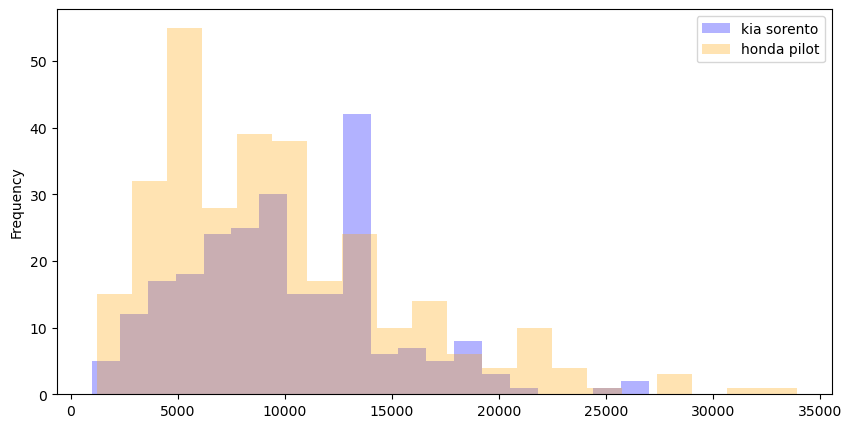

In [34]:
df_kia_manu['price'].plot(kind='hist', bins=20, figsize=(10,5), color='blue', alpha=0.3)
df_honda_manu['price'].plot(kind='hist', bins=20, figsize=(10,5), color='orange', alpha=0.3)
plt.legend(['kia sorento','honda pilot'])
plt.show()

In [37]:
kia_excellent_20= df_kia_manu.query("condition == 'excellent'")[['model_year', 'condition']].head(20)
print(kia_excellent_20)                                                                      

      model_year  condition
8         2012.0  excellent
257       2013.0  excellent
1019      2008.0  excellent
1244      2015.0  excellent
1607      2013.0  excellent
1753      2016.0  excellent
2023      2015.0  excellent
2252      2015.0  excellent
2429      2015.0  excellent
2582      2013.0  excellent
3096      2016.0  excellent
3433      2011.0  excellent
3456      2016.0  excellent
3485      2015.0  excellent
3527      2015.0  excellent
4183      2017.0  excellent
4374      2012.0  excellent
4656      2012.0  excellent
4703      2015.0  excellent
5151      2013.0  excellent


In [38]:
honda_excellent_20= df_honda_manu.query("condition == 'excellent'")[['model_year', 'condition']].head(20)
print(honda_excellent_20)                                                                      

      model_year  condition
7         2013.0  excellent
9         2008.0  excellent
343       2005.0  excellent
598       2011.0  excellent
869       2004.0  excellent
1104      2012.0  excellent
2085      2003.0  excellent
3461      2011.0  excellent
3858      2014.0  excellent
5032      2006.0  excellent
5270      2003.0  excellent
5415      2010.0  excellent
5532      2010.0  excellent
7213      2018.0  excellent
7396      2008.0  excellent
7755      2013.0  excellent
7805         0.0  excellent
7881      2007.0  excellent
8749         0.0  excellent
9127      2011.0  excellent


In [ ]:
kia_excellent_20